# Import libraries

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils import *

plt.style.use('ggplot')

# Parameters

In [2]:
fig_dir = 'data/figure'
exp_name = 'compare_group_size'
time_path = 'data/time/compare_group_size_2020_12_3_20_32_13.npy'
cost_path = 'data/cost/compare_group_size_2020_12_3_20_32_13.npy'
methods = ['greedy', 'approx', 'approx_woc']
sizes = np.arange(4, 18, step=2)
repeats = len(sizes)

# Load data

In [3]:
%%time
run_time = np.load(time_path)
travel_cost = np.load(cost_path)
print(run_time.shape, travel_cost.shape)

(21,) (21,)
Wall time: 7 ms


# Convert to DataFrame

In [4]:
df_time = pd.DataFrame(run_time.reshape(repeats,-1)/np.power(10,6), columns=methods)
df_time.loc[:, 'size'] = sizes
print(df_time.shape)
print(df_time.info())
display(df_time)

(7, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      7 non-null      float64
 1   approx      7 non-null      float64
 2   approx_woc  7 non-null      float64
 3   size        7 non-null      int32  
dtypes: float64(3), int32(1)
memory usage: 324.0 bytes
None


,greedy,approx,approx_woc,size
0,0.000100,0.158720,0.115022,4
1,0.000000,0.270439,0.112186,6
2,0.000000,0.617566,0.110985,8
3,0.000000,0.872578,0.125002,10
4,0.000000,1.687540,0.114245,12
5,0.000000,4.781833,0.107951,14
6,0.000199,28.959952,0.138439,16


In [5]:
df_cost =  pd.DataFrame(travel_cost.reshape(repeats,-1), columns=methods)
df_cost.loc[:, 'size'] = sizes
print(df_cost.shape)
print(df_cost.info())
display(df_cost)

(7, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      7 non-null      float64
 1   approx      7 non-null      float64
 2   approx_woc  7 non-null      float64
 3   size        7 non-null      int32  
dtypes: float64(3), int32(1)
memory usage: 324.0 bytes
None


,greedy,approx,approx_woc,size
0,10378.3,9003.6,8978.7,4
1,10378.3,8701.8,8978.7,6
2,10378.3,8661.5,8978.7,8
3,10378.3,8549.8,8978.7,10
4,10378.3,8531.6,8978.7,12
5,10378.3,8603.6,8978.7,14
6,10378.3,8418.0,8978.7,16


# Calculate metrics 

## Processing time

In [6]:
df_time.mean()

greedy         0.000043
approx         5.335518
approx_woc     0.117690
size          10.000000
dtype: float64

## Ride-sharing efficiency

In [7]:
df_cost.loc[:, 'approx_gain'] = df_cost['greedy']/df_cost['approx']
df_cost.loc[:, 'approx_woc_gain'] = df_cost['greedy']/df_cost['approx_woc']
display(df_cost)

,greedy,approx,approx_woc,size,approx_gain,approx_woc_gain
0,10378.3,9003.6,8978.7,4,1.152683,1.15588
1,10378.3,8701.8,8978.7,6,1.192661,1.15588
2,10378.3,8661.5,8978.7,8,1.198210,1.15588
3,10378.3,8549.8,8978.7,10,1.213865,1.15588
4,10378.3,8531.6,8978.7,12,1.216454,1.15588
5,10378.3,8603.6,8978.7,14,1.206274,1.15588
6,10378.3,8418.0,8978.7,16,1.232870,1.15588


In [8]:
df_cost[['approx_gain', 'approx_woc_gain']].mean()

approx_gain        1.20186
approx_woc_gain    1.15588
dtype: float64

In [9]:
df_cost[['greedy', 'approx', 'approx_woc']].mean()

greedy        10378.300000
approx         8638.557143
approx_woc     8978.700000
dtype: float64

# Plots

## Processing time

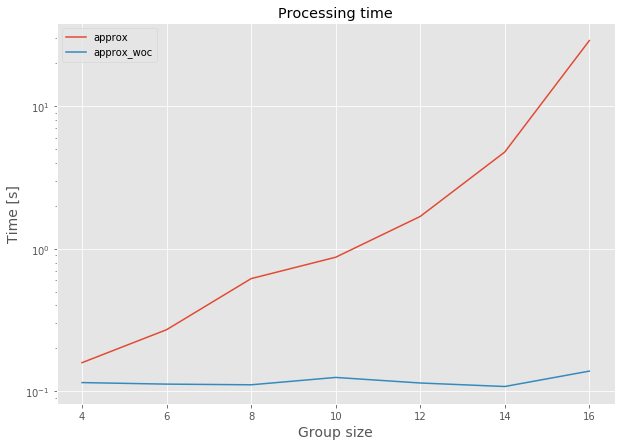

In [10]:
plt.figure(figsize=(10, 7))
plt.plot(sizes, df_time['approx'], label='approx')
plt.plot(sizes, df_time['approx_woc'], label='approx_woc')
plt.yscale('log')
plt.xlabel('Group size', fontsize=14)
plt.ylabel('Time [s]', fontsize=14)
plt.title('Processing time')
plt.legend()
plt.savefig(os.path.join(fig_dir, f'{exp_name}_proc_time.png'))
plt.show()

## Travel cost

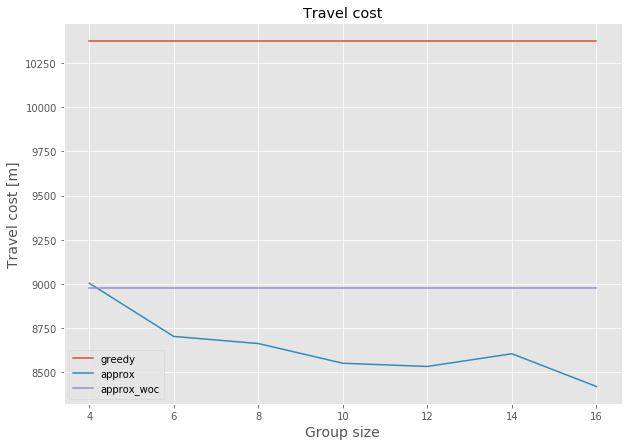

In [11]:
plt.figure(figsize=(10, 7))
plt.plot(sizes, df_cost['greedy'], label='greedy')
plt.plot(sizes, df_cost['approx'], label='approx')
plt.plot(sizes, df_cost['approx_woc'], label='approx_woc')
plt.xlabel('Group size', fontsize=14)
plt.ylabel('Travel cost [m]', fontsize=14)
plt.title('Travel cost')
plt.legend()
plt.savefig(os.path.join(fig_dir, f'{exp_name}_travel_cost.png'))
plt.show()

## Ride-sharing efficiency

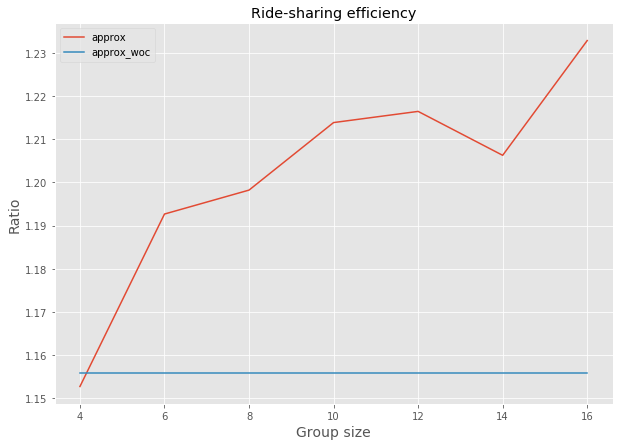

In [12]:
plt.figure(figsize=(10, 7))
plt.plot(sizes, df_cost['approx_gain'], label='approx')
plt.plot(sizes, df_cost['approx_woc_gain'], label='approx_woc')
plt.xlabel('Group size', fontsize=14)
plt.ylabel('Ratio', fontsize=14)
plt.title('Ride-sharing efficiency')
plt.legend()
plt.savefig(os.path.join(fig_dir, f'{exp_name}_rs_efficiency.png'))
plt.show()